In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mirt import MIRT, JointMIRT

df = pd.read_csv('data.csv', low_memory=False)
riasec_df = df.iloc[:, :48]
tipi_df = df.iloc[:, 51:61]
vcl_df = df.iloc[:, 61:77]

n_students = riasec_df.shape[0]
n_riasec_items = riasec_df.shape[1]
n_tipi_items = tipi_df.shape[1]
n_vcl_items = vcl_df.shape[1]

n_riasec_categories = 5
n_tipi_categories = 7


riasec_df.replace(0,1,inplace=True)
tipi_df.replace(0,1,inplace=True)


combined_responses = [riasec_df.values-1, tipi_df.values-1, vcl_df.values]

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mirt import MIRT, JointMIRT

rp = pd.read_csv('riasec_params_2d.csv')
tp = pd.read_csv('tipi_params_2d.csv')
vp = pd.read_csv('vcl_params_2d.csv')


ra = rp.iloc[:, :2].values
rb = rp.iloc[:, 2:].values
ta = tp.iloc[:, :2].values
tb = tp.iloc[:, 2:].values
va = vp.iloc[:, :2].values
vb = vp.iloc[:, 2:].values

# rb = np.random.randn(48, 4)
# ta = np.random.randn(10, 2)
# tb = np.random.randn(10, 4)
# va = np.random.randn(16, 2)
# vb = np.random.randn(16)

In [ ]:
riasec_name =[cat+str(num) for cat in ['R', 'I', 'A', 'S', 'E', 'C'] for num in range(1, 9)]

df = pd.DataFrame({
    'item_id': list(range(74)),
    'item_type': ['likert']*58+['binary']*16,
    'a': list(ra)+list(ta)+list(va),
    'b': list(rb)+list(tb)+list(vb),
    'item_name': riasec_name+['TIPI'+str(i) for i in range(1, 11)]+['VCL'+str(i) for i in range(1, 17)]
})

df.to_csv('combined_params.csv', index=False)

,item_id,item_type,a,b,item_name
0,0,likert,"[0.50525516, 0.5577716]","[0.48221168, -0.626336, 0.8483247, 0.7227395]",R1
1,1,likert,"[0.524633, 0.59420663]","[0.8017829, 0.03557577, 0.75502944, 1.2922475]",R2
2,2,likert,"[0.4580862, 0.54075986]","[1.2415437, 0.48471054, 0.8020799, 1.009088]",R3
3,3,likert,"[0.51237535, 0.61570317]","[0.5639593, 0.17390423, 0.47469407, 0.8733632]",R4
4,4,likert,"[0.6208623, 0.7129248]","[0.9982136, 0.6832895, 1.1405613, 1.1605042]",R5


In [30]:
import pickle
data = {
    'item_id': list(range(74)),
    'item_type': ['likert']*58+['binary']*16,
    'a': list(ra)+list(ta)+list(va),
    'b': list(rb)+list(tb)+list(vb),
    'item_name': riasec_name+['TIPI'+str(i) for i in range(1, 11)]+['VCL'+str(i) for i in range(1, 17)]
}

with open('combined_params.pkl', 'wb') as f:
    pickle.dump(data, f)
with open('combined_params.pkl', 'rb') as f:
    loaded_data = pickle.load(f)
    
print(loaded_data['b'], len(loaded_data['b']))

[array([ 0.48221168, -0.626336  ,  0.8483247 ,  0.7227395 ]), array([0.8017829 , 0.03557577, 0.75502944, 1.2922475 ]), array([1.2415437 , 0.48471054, 0.8020799 , 1.009088  ]), array([0.5639593 , 0.17390423, 0.47469407, 0.8733632 ]), array([0.9982136, 0.6832895, 1.1405613, 1.1605042]), array([0.62653035, 0.11150572, 0.68728274, 1.2391198 ]), array([0.60952073, 0.3995039 , 1.0943915 , 1.252364  ]), array([0.78935915, 0.396856  , 0.8942897 , 1.2548378 ]), array([-0.08874645, -0.6384786 , -0.21159112,  0.06709191]), array([ 0.0479616 , -0.5583176 , -0.32368818,  0.26902673]), array([ 0.16208328, -0.37909567, -0.1985323 ,  0.39315194]), array([ 0.16229536, -0.34932745, -0.00932184,  0.36219501]), array([ 0.31851092, -0.29878578,  0.00386784,  0.5451808 ]), array([ 0.24550286, -0.3739902 , -0.06636423,  0.44701117]), array([ 0.3248947 , -0.23961733,  0.12263109,  0.5694265 ]), array([ 0.5648124 , -0.07446972,  0.19789995,  0.7567628 ]), array([ 0.53280497, -0.02878604,  0.39067352,  0.575062

In [38]:
converted = [
    {
        'item_id': data['item_id'][idx],
        'item_type': data['item_type'][idx],
        'a': data['a'][idx],
        'b': data['b'][idx],
        'item_name': data['item_name'][idx]
    }
    for idx in range(74)
]

import json
with open('combined_params.json', 'w') as f:
    json.dump([{
        'item_id': data['item_id'][idx],
        'item_type': data['item_type'][idx],
        'a': data['a'][idx].tolist(),
        'b': data['b'][idx].tolist(),
        'item_name': data['item_name'][idx]
    } for idx in range(74)], f, indent=4)

In [37]:
converted

[{'item_id': 0,
  'item_type': 'likert',
  'a': array([0.50525516, 0.5577716 ]),
  'b': array([ 0.48221168, -0.626336  ,  0.8483247 ,  0.7227395 ]),
  'item_name': 'R1'},
 {'item_id': 1,
  'item_type': 'likert',
  'a': array([0.524633  , 0.59420663]),
  'b': array([0.8017829 , 0.03557577, 0.75502944, 1.2922475 ]),
  'item_name': 'R2'},
 {'item_id': 2,
  'item_type': 'likert',
  'a': array([0.4580862 , 0.54075986]),
  'b': array([1.2415437 , 0.48471054, 0.8020799 , 1.009088  ]),
  'item_name': 'R3'},
 {'item_id': 3,
  'item_type': 'likert',
  'a': array([0.51237535, 0.61570317]),
  'b': array([0.5639593 , 0.17390423, 0.47469407, 0.8733632 ]),
  'item_name': 'R4'},
 {'item_id': 4,
  'item_type': 'likert',
  'a': array([0.6208623, 0.7129248]),
  'b': array([0.9982136, 0.6832895, 1.1405613, 1.1605042]),
  'item_name': 'R5'},
 {'item_id': 5,
  'item_type': 'likert',
  'a': array([0.603617  , 0.69001245]),
  'b': array([0.62653035, 0.11150572, 0.68728274, 1.2391198 ]),
  'item_name': 'R6'},


In [11]:
mirt = MIRT(n_students, n_riasec_items, n_dims=2, n_categories=n_riasec_categories)
mirt.specify_model(model_type="GPCM")
mirt.fit(riasec_df.values-1, n_epochs=500, lr=0.01)

single_theta = mirt.theta.detach().numpy()
single_a = mirt.item_model.a.detach().numpy()
single_b = mirt.item_model.b.detach().numpy()

Training MIRT Model:   0%|          | 0/500 [00:00<?, ?it/s]

In [15]:
single_theta_norm

array([[-0.5276467 ,  0.8034531 ],
       [-0.17926054, -0.5933209 ],
       [-0.5750046 , -0.1642677 ],
       ...,
       [-0.6288446 , -0.37810132],
       [-1.035421  ,  1.7729079 ],
       [ 0.61238945,  0.20101461]], shape=(145828, 2), dtype=float32)

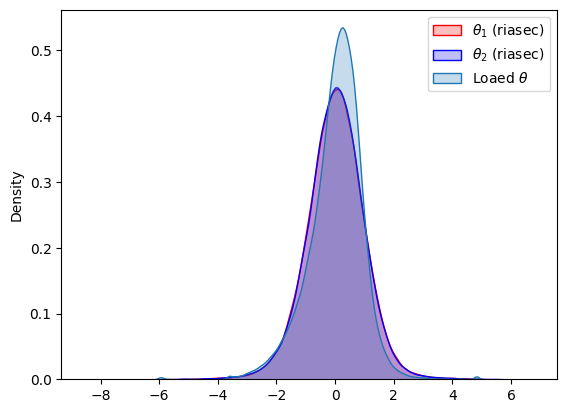

In [13]:
theta_df = pd.read_csv('thetas.csv')
theta_from_df = theta_df.values
fig, ax = plt.subplots()

single_theta = single_theta.squeeze()
mu = single_theta.mean(axis=0)
sigma = single_theta.std(axis=0)

single_theta_norm = (single_theta - mu) / sigma

# single_theta -= single_theta.mean()
# single_theta /= single_theta.std()

sns.kdeplot(single_theta_norm[:, 0], ax=ax ,label=r'$\theta_1$ (riasec)', color='red', fill=True)
sns.kdeplot(single_theta_norm[:, 1], ax=ax ,label=r'$\theta_2$ (riasec)', color='blue', fill=True)
sns.kdeplot(theta_from_df, ax=ax, label=r'Loaed $\theta$', color='green', fill=True)
plt.legend()
plt.show()

In [10]:
jmirt = JointMIRT(n_students, n_dims=2)
jmirt.add_model("GPCM", n_items=n_riasec_items, n_categories=n_riasec_categories)
jmirt.add_model("GPCM", n_items=n_tipi_items, n_categories=n_tipi_categories)
jmirt.add_model("2PL", n_items=n_vcl_items)

jmirt.fit(combined_responses, n_epochs=500, lr=0.01)

JointMIRT(
  (item_models): ModuleList(
    (0-1): 2 x GPCMModel()
    (2): TwoPLModel()
  )
)

In [16]:
riasec_a = jmirt.item_models[0].a.detach().numpy()
riasec_b = jmirt.item_models[0].b.detach().numpy()
tipi_a = jmirt.item_models[1].a.detach().numpy()
tipi_b = jmirt.item_models[1].b.detach().numpy()
vcl_a = jmirt.item_models[2].a.detach().numpy()
vcl_b = jmirt.item_models[2].b.detach().numpy()

In [19]:
riasec_prarms = pd.DataFrame(np.concatenate([riasec_a, riasec_b], axis=1), columns=['a1', 'a2', 'b1', 'b2', 'b3', 'b4'])
tipi_prarms = pd.DataFrame(np.concatenate([tipi_a, tipi_b], axis=1), columns=['a1', 'a2','b1', 'b2', 'b3', 'b4', 'b5', 'b6'])
vcl_prarms = pd.DataFrame(np.column_stack([vcl_a, vcl_b]), columns=['a1', 'a2', 'b'])

vcl_prarms.to_csv('vcl_params_2d.csv', index=False)
tipi_prarms.to_csv('tipi_params_2d.csv', index=False)
riasec_prarms.to_csv('riasec_params_2d.csv', index=False)

In [27]:
np.dot(riasec_a, mu)

array([-0.00599717, -0.00627748, -0.00555454, -0.00624913, -0.00746144,
       -0.00724379, -0.00852262, -0.00735261, -0.00300398, -0.00364933,
       -0.00392329, -0.00409673, -0.00397275, -0.00432108, -0.00404351,
       -0.00520405, -0.00455091, -0.00472298, -0.00382707, -0.00372882,
       -0.00318771, -0.0041369 , -0.00425502, -0.00548453, -0.00451201,
       -0.00415842, -0.00362986, -0.00540313, -0.00385847, -0.00501304,
       -0.00511103, -0.00520751, -0.00617618, -0.00616472, -0.00795602,
       -0.00540206, -0.00660838, -0.00685951, -0.00547804, -0.00855963,
       -0.00670478, -0.007948  , -0.0081398 , -0.00783817, -0.00599425,
       -0.00718403, -0.00779551, -0.00926719], dtype=float32)

In [33]:
np.mean(5)

np.float64(5.0)

In [35]:
joint_theta = jmirt.theta.detach().numpy().squeeze()
mu = joint_theta.mean(axis=0)
sigma = joint_theta.std(axis=0)
joint_theta_norm = (joint_theta - mu) / sigma


pd.DataFrame(single_theta_norm, columns=['theta1', 'theta2']).to_csv('single_theta_2d.csv', index=False)
pd.DataFrame(joint_theta, columns=['theta1', 'theta2']).to_csv('joint_theta_2d.csv', index=False)
pd.DataFrame(joint_theta_norm, columns=['theta1', 'theta2']).to_csv('joint_theta_norm_2d.csv', index=False)

def a_norm(a, sigma):
    return a * sigma
def gpcm_b_norm(b, a, mu, sigma):
    a_eff = np.mean(a, axis=1)
    mu_eff = np.mean(mu)
    sigma_eff = np.mean(sigma)
    
    T = np.cumsum(b, axis=1)
    T = np.concatenate([np.zeros((T.shape[0], 1)), T], axis=1)
    T_norm = np.zeros_like(T)
    for c in range(T.shape[1]):
        T_norm[:, c] = (T[:, c] - c * a_eff * mu_eff) / sigma_eff
    return np.diff(T_norm, axis=1)

riasec_a_norm = a_norm(riasec_a, sigma)
riasec_b_norm = gpcm_b_norm(riasec_b, riasec_a, mu, sigma)
tipi_a_norm = a_norm(tipi_a, sigma)
tipi_b_norm = gpcm_b_norm(tipi_b, tipi_a, mu, sigma)
vcl_a_norm = a_norm(vcl_a, sigma)
vcl_b_norm = (vcl_b - mu.mean()) / sigma.mean()

In [3]:
import numpy as np
np.random.normal(0, 1, 2)

array([ 0.20328788, -0.27498867])

In [36]:
riasec_norm_params = pd.DataFrame(np.concatenate([riasec_a_norm, riasec_b_norm], axis=1), columns=['a1', 'a2', 'b1', 'b2', 'b3', 'b4'])
tipi_norm_params = pd.DataFrame(np.concatenate([tipi_a_norm, tipi_b_norm], axis=1), columns=['a1', 'a2', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6'])
vcl_norm_params = pd.DataFrame(np.column_stack([vcl_a_norm, vcl_b_norm]), columns=['a1', 'a2', 'b'])

vcl_norm_params.to_csv('vcl_norm_params_2d.csv', index=False)
tipi_norm_params.to_csv('tipi_norm_params_2d.csv', index=False)
riasec_norm_params.to_csv('riasec_norm_params_2d.csv', index=False)

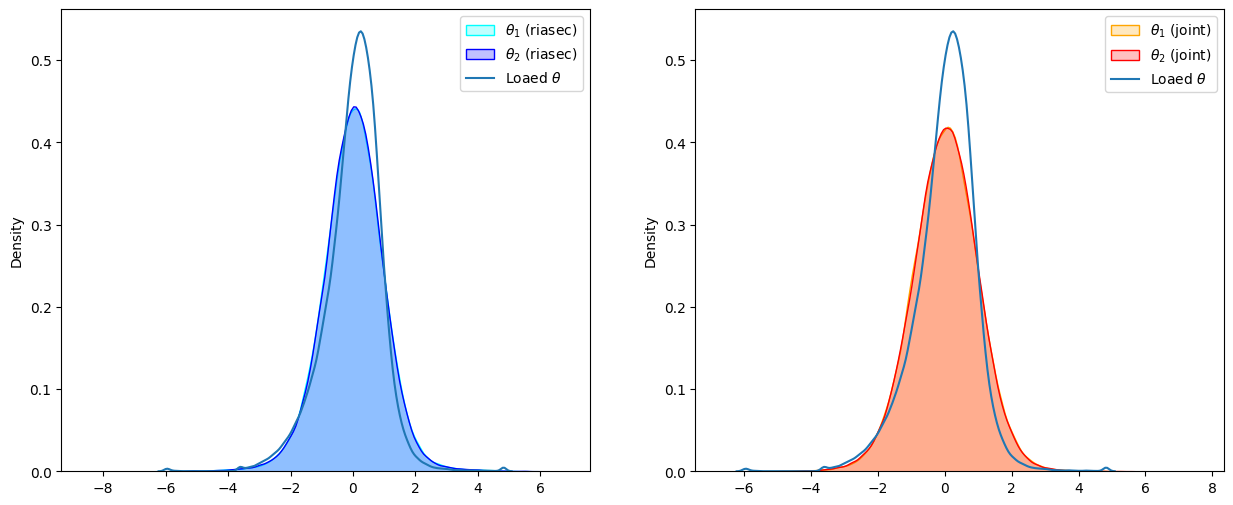

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.kdeplot(single_theta_norm[:, 0], ax=ax[0] ,label=r'$\theta_1$ (riasec)', color='cyan', fill=True)
sns.kdeplot(single_theta_norm[:, 1], ax=ax[0] ,label=r'$\theta_2$ (riasec)', color='blue', fill=True)
sns.kdeplot(joint_theta_norm[:, 0], ax=ax[1] ,label=r'$\theta_1$ (joint)', color='orange', fill=True)
sns.kdeplot(joint_theta_norm[:, 1], ax=ax[1] ,label=r'$\theta_2$ (joint)', color='red', fill=True)
for x in [ax[0], ax[1]]:

    sns.kdeplot(theta_from_df, ax=x, label=r'Loaed $\theta$', color='black')
    x.legend()

plt.show()


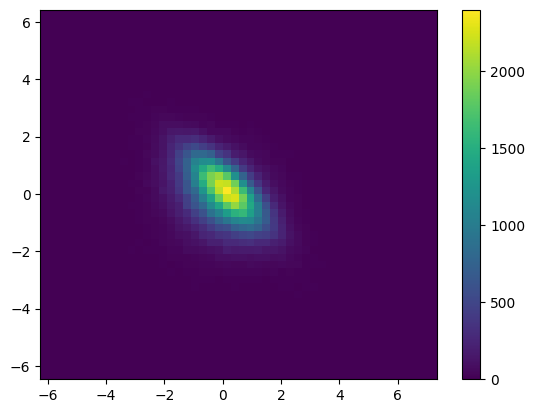

In [43]:
plt.hist2d(joint_theta_norm[:, 0], joint_theta_norm[:, 1], bins=50, cmap='viridis')
plt.colorbar()
plt.show()

In [68]:
np.concatenate([riasec_a, single_a, a[..., np.newaxis]], axis=1).shape

(48, 3)

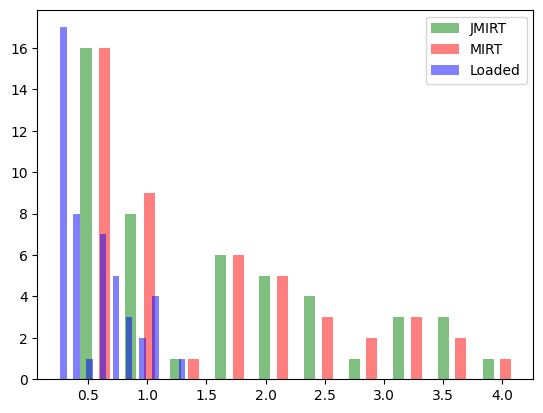

In [78]:
item_pars = pd.read_csv('item_pars.csv').values

a = item_pars[:, 0]
b = item_pars[:, 1:5]

combined_a = np.concatenate([riasec_a, single_a, a[..., np.newaxis]], axis=1)
label = ['JMIRT', 'MIRT', 'Loaded']
plt.hist(riasec_a.squeeze(), bins=10, alpha=0.5, label='JMIRT', color='green', align='left', rwidth=0.25)
plt.hist(single_a.squeeze(), bins=10, alpha=0.5, label='MIRT', color='red', align='mid', rwidth=0.25)
plt.hist(a, bins=10, alpha=0.5, label='Loaded', color='blue', align='right', rwidth=0.5)
plt.legend()
plt.show()